<a href="https://colab.research.google.com/github/Randa1989/Demo/blob/main/Boston_Weather_2013_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from google.colab import files
import io
data=files.upload()
     

Saving boston_weather_data (1).csv to boston_weather_data (1).csv


In [2]:
df=pd.read_csv(io.StringIO(data['boston_weather_data (1).csv'].decode('utf-8')))

In [3]:
df.head()

,time,tavg,tmin,tmax,prcp,wdir,wspd,pres
0,2013-03-01,3.2,1.1,5.0,0.0,342.0,15.1,1002.7
1,2013-03-02,3.1,1.1,5.6,0.0,307.0,14.4,1004.2
2,2013-03-03,2.6,0.6,6.1,0.0,NaN,14.4,1002.6
3,2013-03-04,1.8,-0.6,5.0,0.0,303.0,28.1,1003.0
4,2013-03-05,2.9,0.0,6.1,0.0,NaN,16.6,1013.5


In [4]:
df['time'] = pd.to_datetime(df['time'])

df['year'] = df['time'].dt.year

#month as a number
df['month_index'] = df['time'].dt.month
#month as a string
df['month'] = df['time'].dt.strftime('%b')

In [5]:
df.describe()

,tavg,tmin,tmax,prcp,wdir,wspd,pres,year,month_index
count,3652.000000,3653.000000,3653.000000,3653.000000,3066.000000,3653.000000,3492.000000,3653.000000,3653.000000
mean,11.549863,7.507692,15.875691,2.936819,200.876712,17.555407,1016.520790,2017.663290,6.522584
std,9.559483,9.386869,10.221851,7.505755,100.070063,6.009118,7.767252,2.896718,3.449026
min,-17.800000,-23.300000,-12.100000,0.000000,0.000000,2.500000,983.900000,2013.000000,1.000000
25%,3.900000,0.600000,7.200000,0.000000,112.000000,13.300000,1011.400000,2015.000000,4.000000
50%,11.500000,7.800000,15.600000,0.000000,226.500000,16.600000,1016.400000,2018.000000,7.000000
75%,19.900000,15.600000,24.400000,1.500000,279.000000,20.900000,1021.600000,2020.000000,10.000000
max,32.300000,28.300000,37.800000,78.000000,360.000000,61.200000,1042.400000,2023.000000,12.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   time         3653 non-null   datetime64[ns]
 1   tavg         3652 non-null   float64       
 2   tmin         3653 non-null   float64       
 3   tmax         3653 non-null   float64       
 4   prcp         3653 non-null   float64       
 5   wdir         3066 non-null   float64       
 6   wspd         3653 non-null   float64       
 7   pres         3492 non-null   float64       
 8   year         3653 non-null   int64         
 9   month_index  3653 non-null   int64         
 10  month        3653 non-null   object        
dtypes: datetime64[ns](1), float64(7), int64(2), object(1)
memory usage: 314.1+ KB


Data Visualization¶


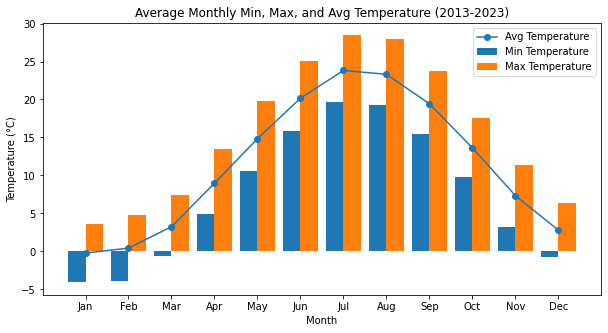

In [7]:
df_avg_temp = df.groupby(['year', 'month','month_index']).mean()[['tavg', 'tmin', 'tmax']]
df_avg_temp = df_avg_temp.reset_index()

# calculate average of all years
df_avg_temp_all = df_avg_temp.groupby(['month_index', 'month']).mean()

# plot the bar chart
plt.figure(figsize=(10, 5))
plt.bar(np.array(df_avg_temp_all.index.get_level_values(0)) - 0.2, df_avg_temp_all['tmin'], width=0.4, label='Min Temperature')
plt.bar(np.array(df_avg_temp_all.index.get_level_values(0)) + 0.2, df_avg_temp_all['tmax'], width=0.4, label='Max Temperature')
plt.plot(np.array(df_avg_temp_all.index.get_level_values(0)), df_avg_temp_all['tavg'], 'o-', label='Avg Temperature')

# add labels and title
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Average Monthly Min, Max, and Avg Temperature (2013-2023)')
df_avg_temp_all=df_avg_temp_all.reset_index()
plt.xticks(df_avg_temp_all.index + 1,df_avg_temp_all['month'])

# add legend
plt.legend()

# show the plot
plt.show()

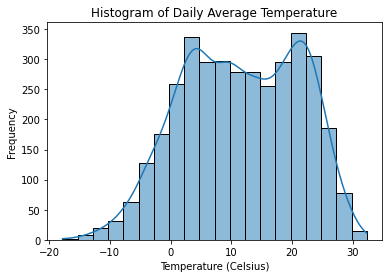

In [8]:
# Data visualization: Histogram of daily average temperature
sns.histplot(df['tavg'], bins=20, kde=True)
plt.title('Histogram of Daily Average Temperature')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Frequency')
plt.show()

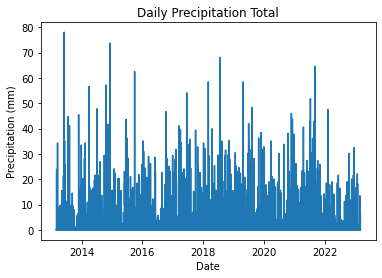

In [9]:
# Data visualization: Line plot of daily precipitation total
plt.plot(df['time'], df['prcp'])
plt.title('Daily Precipitation Total')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.show()

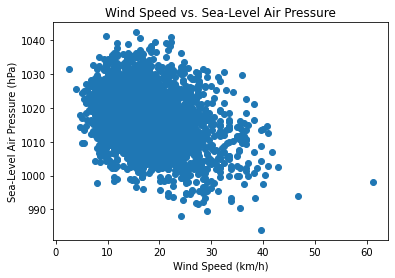

In [10]:
# Data visualization: Scatter plot of wind speed vs. sea-level air pressure
plt.scatter(df['wspd'], df['pres'])
plt.title('Wind Speed vs. Sea-Level Air Pressure')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Sea-Level Air Pressure (hPa)')
plt.show()